<a href="https://colab.research.google.com/github/Saganero/machine-learning-bootcamp/blob/main/Mushrooms_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale = 1.3)

In [120]:
raw_data = pd.read_csv('mushrooms.csv')

In [121]:
df = raw_data.copy()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [123]:
df = df.astype('category')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [125]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [126]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [127]:
df = df.drop('veil-type', axis = 1)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

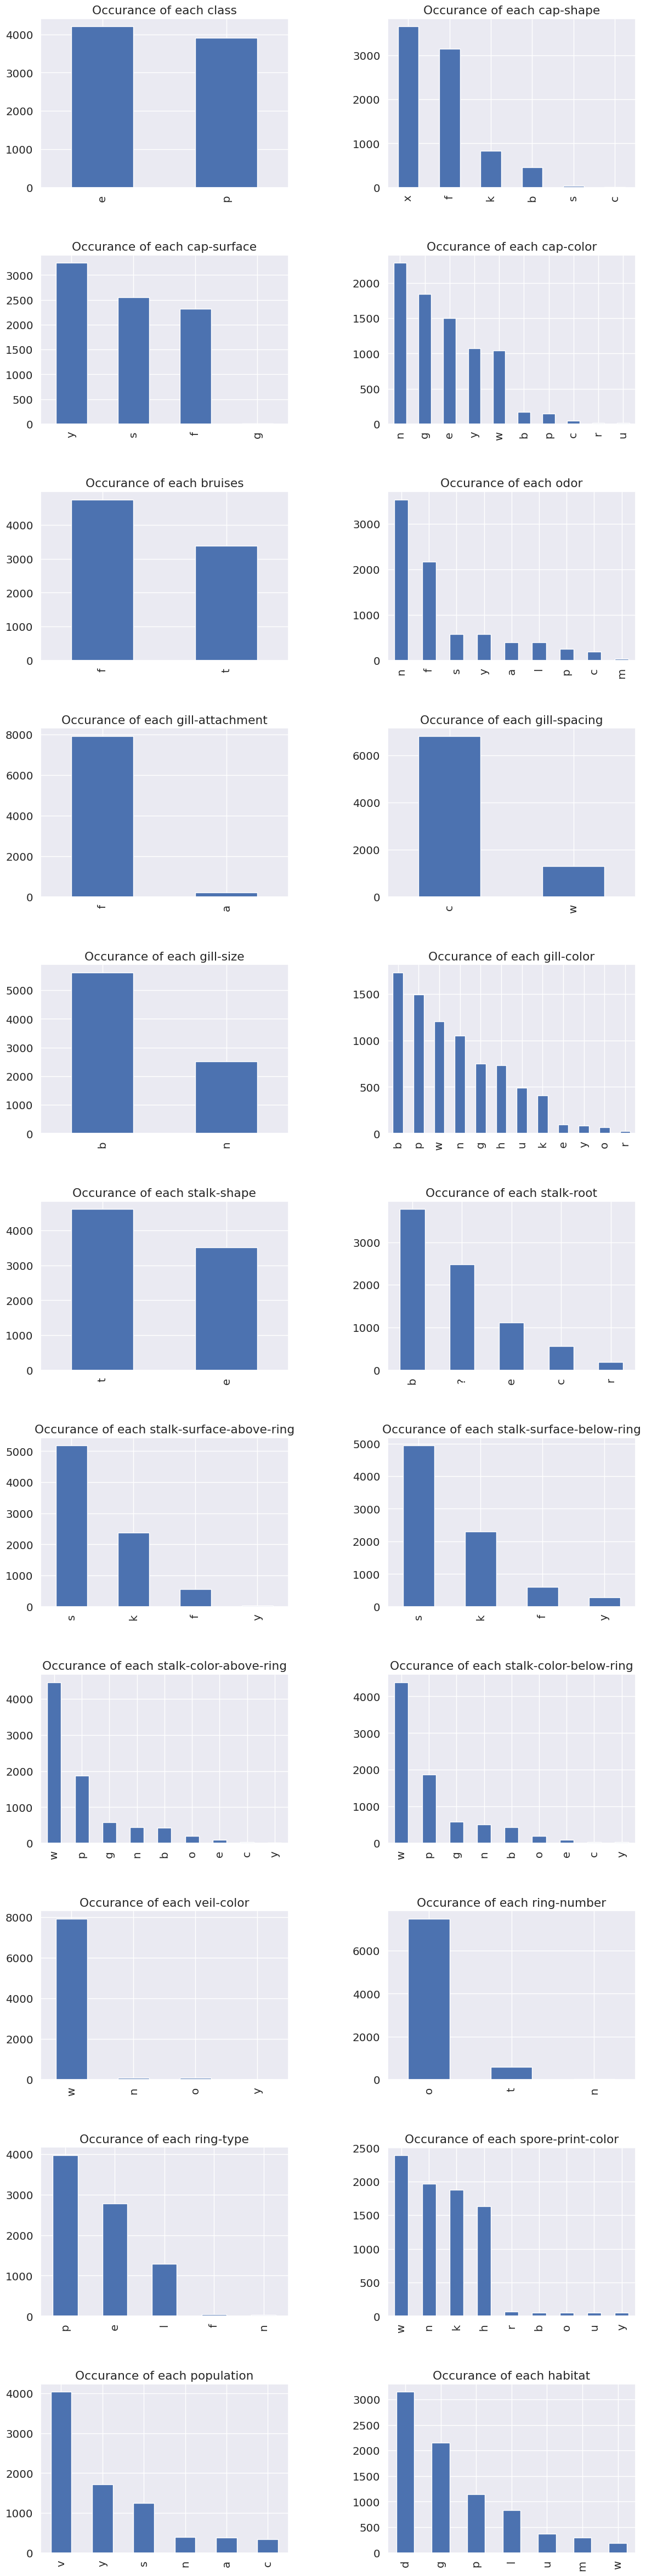

In [129]:
#Visualization

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(60)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 23):
  ax = fig.add_subplot(11,2,i)
  df[df.columns[i-1]].value_counts().plot(kind = 'bar')
  plt.title(f'Occurance of each {df.columns[i-1]}')


In [130]:
df_dummies = pd.get_dummies(data = df, columns = ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'ring-number'], prefix = 'is', drop_first = True)
df_dummies.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,spore-print-color,population,habitat,is_t,is_f,is_w,is_n,is_t,is_o,is_t
0,p,x,s,n,p,k,e,s,s,w,...,k,s,u,1,1,0,1,0,1,0
1,e,x,s,y,a,k,c,s,s,w,...,n,n,g,1,1,0,0,0,1,0
2,e,b,s,w,l,n,c,s,s,w,...,n,n,m,1,1,0,0,0,1,0
3,p,x,y,w,p,n,e,s,s,w,...,k,s,u,1,1,0,1,0,1,0
4,e,x,s,g,n,k,e,s,s,w,...,n,a,g,0,1,1,0,1,1,0


In [131]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-color                8124 non-null   category
 6   stalk-root                8124 non-null   category
 7   stalk-surface-above-ring  8124 non-null   category
 8   stalk-surface-below-ring  8124 non-null   category
 9   stalk-color-above-ring    8124 non-null   category
 10  stalk-color-below-ring    8124 non-null   category
 11  veil-color                8124 non-null   category
 12  ring-type                 8124 non-null   category
 13  spore-print-color         8124 non-null   catego

In [132]:
cat_col = df_dummies.select_dtypes(include = ['category']).columns
cat_col


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [133]:
df_dummies[cat_col]

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-type,spore-print-color,population,habitat
0,p,x,s,n,p,k,e,s,s,w,w,w,p,k,s,u
1,e,x,s,y,a,k,c,s,s,w,w,w,p,n,n,g
2,e,b,s,w,l,n,c,s,s,w,w,w,p,n,n,m
3,p,x,y,w,p,n,e,s,s,w,w,w,p,k,s,u
4,e,x,s,g,n,k,e,s,s,w,w,w,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,y,?,s,s,o,o,o,p,b,c,l
8120,e,x,s,n,n,y,?,s,s,o,o,n,p,b,v,l
8121,e,f,s,n,n,n,?,s,s,o,o,o,p,b,c,l
8122,p,k,y,n,y,b,?,s,k,w,w,w,e,w,v,l


In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_dummies[cat_col] = df_dummies[cat_col].apply(le.fit_transform)


In [135]:
df_dummies

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,spore-print-color,population,habitat,is_t,is_f,is_w,is_n,is_t,is_o,is_t
0,1,5,2,4,6,4,3,2,2,7,...,2,3,5,1,1,0,1,0,1,0
1,0,5,2,9,0,4,2,2,2,7,...,3,2,1,1,1,0,0,0,1,0
2,0,0,2,8,3,5,2,2,2,7,...,3,2,3,1,1,0,0,0,1,0
3,1,5,3,8,6,5,3,2,2,7,...,2,3,5,1,1,0,1,0,1,0
4,0,5,2,3,5,4,3,2,2,7,...,3,0,1,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,5,11,0,2,2,5,...,0,1,2,0,0,0,0,0,1,0
8120,0,5,2,4,5,11,0,2,2,5,...,0,4,2,0,0,0,0,0,1,0
8121,0,2,2,4,5,5,0,2,2,5,...,0,1,2,0,0,0,0,0,1,0
8122,1,3,3,4,8,0,0,2,1,7,...,7,4,2,0,1,0,1,1,1,0


In [136]:
df = df_dummies
df.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,spore-print-color,population,habitat,is_t,is_f,is_w,is_n,is_t,is_o,is_t
0,1,5,2,4,6,4,3,2,2,7,...,2,3,5,1,1,0,1,0,1,0
1,0,5,2,9,0,4,2,2,2,7,...,3,2,1,1,1,0,0,0,1,0
2,0,0,2,8,3,5,2,2,2,7,...,3,2,3,1,1,0,0,0,1,0
3,1,5,3,8,6,5,3,2,2,7,...,2,3,5,1,1,0,1,0,1,0
4,0,5,2,3,5,4,3,2,2,7,...,3,0,1,0,1,1,0,1,1,0


In [137]:
#Correlation

corr_matrix = df.corr()
corr_matrix


,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,spore-print-color,population,habitat,is_t,is_f,is_w,is_n,is_t,is_o,is_t
class,1.000000,0.052951,0.178446,-0.031384,-0.093552,-0.530566,-0.379361,-0.334593,-0.298801,-0.154003,...,0.171961,0.298686,0.217179,-0.501530,0.129200,-0.348387,0.540024,-0.102019,0.182101,-0.204600
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.021935,-0.006039,0.030191,-0.030417,-0.032591,-0.031659,...,-0.073416,0.063413,-0.042221,-0.035374,0.078865,0.013196,0.054050,0.063794,0.107800,-0.110565
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.045233,-0.161017,-0.126245,0.089090,0.107965,0.066050,...,0.230364,0.021555,0.163887,0.070228,-0.034180,-0.282306,0.208100,-0.014123,-0.005068,-0.010946
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.387121,0.084659,0.321274,-0.060837,-0.047710,0.002364,...,-0.293523,-0.144770,0.033925,-0.000764,0.041436,0.144259,-0.169464,-0.456496,0.034017,-0.020486
odor,-0.093552,-0.021935,0.045233,-0.387121,1.000000,-0.129213,-0.205215,0.118617,0.061820,0.174532,...,0.469055,-0.043623,-0.026610,-0.061825,-0.059590,0.063936,0.310495,0.459766,-0.110645,0.114810
gill-color,-0.530566,-0.006039,-0.161017,0.084659,-0.129213,1.000000,0.315080,0.224287,0.257224,-0.058299,...,-0.416135,-0.034090,-0.202972,0.527120,-0.128567,0.100193,-0.516736,-0.175699,-0.149944,0.126777
stalk-root,-0.379361,0.030191,-0.126245,0.321274,-0.205215,0.315080,1.000000,-0.027065,0.087454,0.157140,...,-0.536996,-0.306747,-0.007668,0.244188,0.144063,0.350548,-0.344345,-0.163422,0.221910,-0.242139
stalk-surface-above-ring,-0.334593,-0.030417,0.089090,-0.060837,0.118617,0.224287,-0.027065,1.000000,0.437164,0.132708,...,0.100764,0.079604,-0.058076,0.460824,-0.088916,-0.212359,0.056310,0.015193,-0.078345,0.096148
stalk-surface-below-ring,-0.298801,-0.032591,0.107965,-0.047710,0.061820,0.257224,0.087454,0.437164,1.000000,0.106933,...,0.130974,0.046797,-0.039628,0.458983,-0.116177,-0.213775,0.010894,-0.034399,-0.108525,0.076463
stalk-color-above-ring,-0.154003,-0.031659,0.066050,0.002364,0.174532,-0.058299,0.157140,0.132708,0.106933,1.000000,...,0.271533,-0.240261,0.042561,0.083538,0.099299,0.274574,0.296548,0.223439,-0.002121,0.045092


In [139]:
corr_class = corr_matrix['class']


In [141]:
corr_class.abs().sort_values()

cap-color                   0.031384
cap-shape                   0.052951
odor                        0.093552
is_t                        0.102019
is_f                        0.129200
veil-color                  0.145142
stalk-color-below-ring      0.146730
stalk-color-above-ring      0.154003
spore-print-color           0.171961
cap-surface                 0.178446
is_o                        0.182101
is_t                        0.204600
habitat                     0.217179
population                  0.298686
stalk-surface-below-ring    0.298801
stalk-surface-above-ring    0.334593
is_w                        0.348387
stalk-root                  0.379361
ring-type                   0.411771
is_t                        0.501530
gill-color                  0.530566
is_n                        0.540024
class                       1.000000
Name: class, dtype: float64

<Axes: >

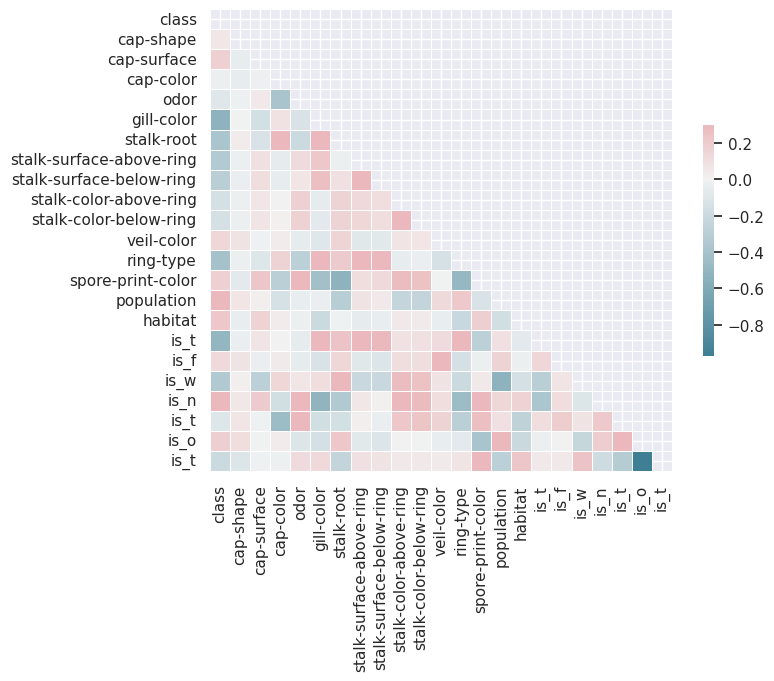

In [146]:
sns.set(style = 'darkgrid')
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (8,6))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr_matrix, mask = mask, cmap = cmap, vmax =.3, center = .0, square = True, linewidths = .5, cbar_kws = {'shrink' : .5})

In [ ]:
#Deviding into data and target sets for model building

target = df.pop('class')
data = df

In [149]:
print(data.shape)
print(target.shape)

(8124, 22)
(8124,)


In [150]:
#Splitting data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5686, 22)
X_test shape: (2438, 22)
y_trian shape: (5686,)
y_test shape: (2438,)


In [156]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter = 500)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.9524200164068909


In [159]:
#Support Vector Machine

from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel='poly', degree = 3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9987694831829368


In [160]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9056603773584906


In [162]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
